## LANGCHAIN VERSION V1

In [4]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

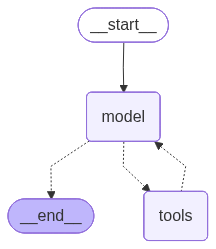

In [5]:
from langchain.agents import create_agent

def get_weather(city:str)-> str:
    """ Get the weather for a city."""
    return f"The weather in {city} is sunny"


agent = create_agent(
    model="gpt-5",
    tools=[get_weather],
    system_prompt="You are a helpful assistant"
)
agent

In [9]:
response = agent.invoke({"messages":[{"role" : "user", "content":"What is the weather like in New York"}]})

In [10]:
response["messages"][-1].content

'The weather in New York is sunny.'

In [11]:
from langchain.chat_models import init_chat_model
model = init_chat_model("gpt-4.1")
model

ChatOpenAI(profile={'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x0000019198227B80>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000019198226740>, root_client=<openai.OpenAI object at 0x0000019198227130>, root_async_client=<openai.AsyncOpenAI object at 0x0000019198227B20>, model_name='gpt-4.1', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [13]:
response = model.invoke("Hello How are you ?")
response.content

"Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?"

## CHATOPENAI

In [29]:
import os
from dotenv import load_dotenv
load_dotenv()
# For OpenAI (gpt-4.1): set OPENAI_API_KEY in .env to your key from https://platform.openai.com/account/api-keys
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

from langchain.chat_models import init_chat_model
model = init_chat_model("gpt-4.1")
model
# response = model.invoke("Why do parrot talk?")
# response.content

ChatOpenAI(profile={'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001919C775150>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001919C6FFEB0>, root_client=<openai.OpenAI object at 0x000001919C775090>, root_async_client=<openai.AsyncOpenAI object at 0x000001919C6FFB80>, model_name='gpt-4.1', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Google Gemini Model Integration

In [18]:
import os 
from langchain.chat_models import init_chat_model

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

model= init_chat_model("google_genai:gemini-2.5-flash-lite")
response = model.invoke("Why do parrot talk")
response.content

'Parrots talk for a fascinating combination of reasons, primarily driven by their **intelligence, social nature, and the incredible ability to mimic sounds.** It\'s not just random noise; there\'s purpose behind their vocalizations.\n\nHere\'s a breakdown of why parrots talk:\n\n**1. Mimicry and Vocal Learning:**\n\n*   **Highly Developed Vocal Apparatus:** Parrots have a specialized organ called the syrinx, which allows them to produce a wide range of sounds, including those that resemble human speech.\n*   **Social Learning:** Unlike many birds that have innate songs, parrots are vocal learners. This means they learn their vocalizations by listening to and imitating sounds in their environment, especially those of their flock. In a human household, their "flock" is us!\n*   **Intelligence:** Parrots are among the most intelligent birds. This intelligence allows them to not only mimic sounds but also to understand context and associate words with objects, actions, or emotions.\n\n**2.

### GROQ MODEL INTEGRATION

In [31]:
import os 
from langchain.chat_models import init_chat_model

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

model = init_chat_model("groq:qwen/qwen3-32b")
model
response=model.invoke("Why do parrot talk?")
response.content

'<think>\nOkay, so the user is asking why parrots talk. Hmm, I need to explain the reasons behind parrots\' ability to mimic human speech. Let me start by recalling what I know about parrots. They\'re part of the Psittaciformes order, right? There are many species, like the African Grey Parrot, which is known for its talking ability. \n\nFirst, maybe it\'s about their vocal anatomy. I remember reading that parrots have a syrinx, which is the vocal organ in birds, but it\'s more complex than in other birds. This might allow them to produce a wide range of sounds. Also, their beaks and tongues are flexible, which helps in shaping the sounds. So their physical structure enables them to mimic human speech.\n\nBut why do they mimic in the first place? In the wild, parrots use vocalizations for communication. They might mimic other birds or sounds in their environment. When they\'re kept as pets, they might mimic humans to communicate with them. It\'s a form of social bonding. So maybe they 

### Streaming

Most models can stream their output content while it is being generated. By displaying output progressively, streaming significantly improves user experience,
particularily for longer responses. Calling stream() returns an interior that yields output chunks as they are produced. You can use a loop to process
each chunk in real-time

In [32]:
model.invoke("Write me a 200 words paragraph about Artificial Intelligence")

AIMessage(content='<think>\nOkay, the user wants a 200-word paragraph about Artificial Intelligence. Let me start by defining what AI is. I should mention machine intelligence and how it mimics human tasks. Maybe include examples like learning, problem-solving, and decision-making. Need to cover different types, like narrow AI versus general AI. Machine learning and deep learning are important to mention as subsets. Applications are key too—healthcare, finance, transportation. Benefits like efficiency and innovation, but also address concerns such as job displacement and ethical issues. Bias in algorithms and data privacy should be noted. Conclude with the balance between potential and challenges, emphasizing responsible development. Keep the tone informative but accessible. Check the word count to stay around 200 words. Avoid jargon where possible. Make sure it flows well, connecting each part logically. Maybe start with a strong opening sentence, then structure each section smoothly.

In [36]:
for chunk in model.stream("Write me a 200 words paragraph about Artificial Intelligence"):
    print(chunk.content, end="|" ,flush=True)

|<think>|
|Okay|,| I| need| to| write| a| |2|0|0|-word| paragraph| about| Artificial| Intelligence|.| Let| me| start| by| thinking| about| the| key| points| to| include|.| First|,| define| what| AI| is|.| Maybe| mention| its| applications| in| different| fields| like| healthcare|,| finance|,| etc|.| Also|,| talk| about| types| of| AI| such| as| machine| learning| and| natural| language| processing|.| Should| I| mention| benefits| and| challenges|?| Yes|,| that| would| add| balance|.| Need| to| keep| it| concise| but| informative|.| Maybe| start| with| a| strong| opening| sentence|.| Let| me| check| the| structure|:| introduction|,| applications|,| technologies|,| benefits| and| challenges|,| conclusion|.| Make| sure| the| flow| is| logical|.| Avoid| technical| j|argon| so| it|'s| accessible|.| Keep| an| eye| on| the| word| count|.| Let| me| draft| a| sentence|:| "|Art|ificial| Intelligence| (|AI|)| refers| to|..."| Then| list| some| applications|.| Maybe| mention| specific| examples| l

### BATCH

Batching a collection of independent requests to a model can significantly improve performance and reduce costs, as the processing can 
can be done in parallel: 

In [37]:
responses = model.batch([
    "Why do parrots have colorful feathers ?",
    "Why do airplanes fly?",
    "What is quantum computing?"
])

for response in responses:
    print(response)

content='<think>\nOkay, so the user is asking why parrots have colorful feathers. Let me start by recalling what I know about parrots. Parrots are known for their vibrant colors—greens, blues, yellows, reds, etc. I need to think about the possible reasons behind this coloration. \n\nFirst, I remember that in many bird species, coloration can serve multiple purposes. One common reason is camouflage. But parrots are often in environments like rainforests where maybe bright colors aren\'t the best for hiding. Wait, but some parrots do blend in with their surroundings. For example, maybe some have green feathers to match leaves. However, many parrots are very colorful and stand out. So maybe camouflage isn\'t the main reason here.\n\nAnother possibility is sexual selection. In many species, males have bright colors to attract females. I think in some parrot species, males are more colorful than females. But I\'m not sure if all parrots follow this pattern. Also, both males and females can 